# Test the conda env

Simple check on scikit-learn and cartopy libraries

Silhouette Coefficient: 0.647


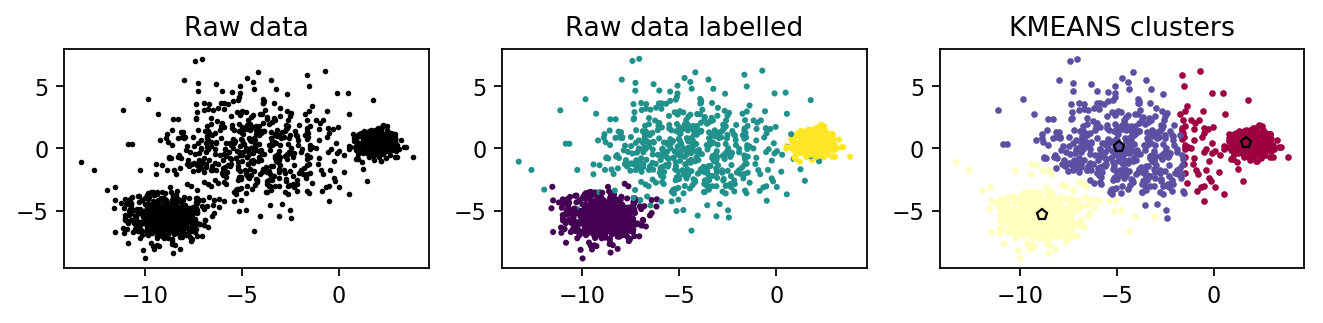

In [8]:
# Test scikit-learn
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=[1.0, 2.5, 0.5])

# transformation = [[0.90834549, -0.63667341], [-0.40887718, 0.85253229]]
# X = np.dot(X, transformation)

plt.figure(figsize=plt.figaspect(0.4), dpi=160, facecolor='w', edgecolor='k')
plt.subplot(231)
plt.plot(X[:, 0], X[:, 1],'k.',markersize=3)
plt.title('Raw data')
plt.subplot(232)
plt.scatter(X[:, 0], X[:, 1], 3, c=y)
plt.title('Raw data labelled')

# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.predict(X)
n_clusters_ = kmeans.n_clusters
kmeans.cluster_centers_.shape

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

plt.subplot(233)
plt.title('KMEANS clusters')
unique_labels = np.unique(labels)
n_clusters_ = unique_labels.shape[0]
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    plt.plot(X[class_members,0], X[class_members,1], '.', 
             markerfacecolor=tuple(col), markeredgecolor='none', label='Class %i'%(k))
    cluster_center = kmeans.cluster_centers_[k,:]
    plt.plot(cluster_center[0], cluster_center[1], 'p', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5, label='Class center #%i'%(k))



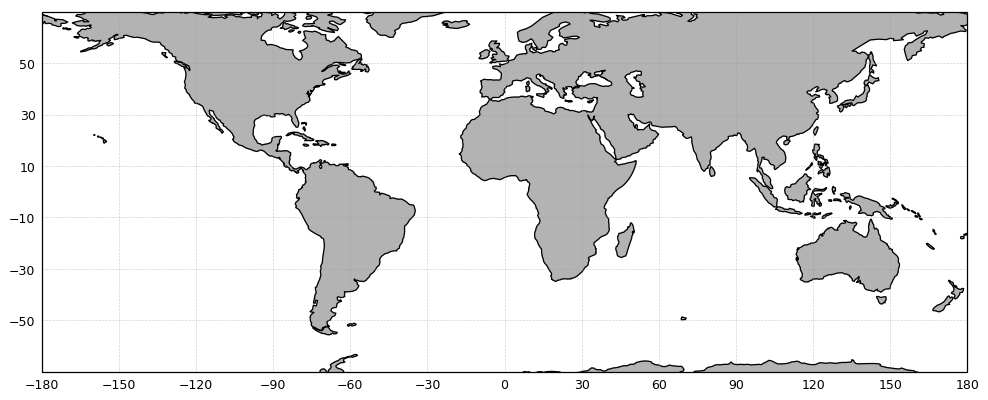

In [1]:
# Test cartography

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.cm as cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import cartopy
# print cartopy.config['data_dir']
# print cartopy.config['repo_data_dir']

def create_map(extent=[-180, 180, -70, 70]):
    fig = plt.figure(figsize=(12,4),dpi=90)
    proj = ccrs.PlateCarree()
    ax = fig.add_axes([0,0,1,1],projection=proj)
    ax.set_extent(extent, crs=proj)
    gl=ax.gridlines(crs=proj, draw_labels=True,
        linewidth=0.5, color=[0.6]*3, alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.linspace(-180,180,360/30+1))
    gl.ylocator = mticker.FixedLocator(np.linspace(-90,90,180/20+1))
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.add_feature(cfeature.LAND, facecolor=[0.7]*3)
    ax.add_feature(cfeature.COASTLINE)
    return fig, proj, ax

fig, proj, ax = create_map()